In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis_sol
import matplotlib.pyplot as plt
importlib.reload(kgs)
#pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/analysis/../core/kaggle_support.py'>

In [ ]:
import numpy as np
import glob
for N_trees in np.arange(4,201,4):
    files = glob.glob(kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_*.pickle')
    #print(N_trees,files)
    if len(files)>1:
        plt.figure()
        for f in files:
            dat = kgs.dill_load(f)
            plt.plot([x[0] for x in dat.ga.best_costs_per_generation[0]], label=f[20:])
        plt.title(f'N_trees={N_trees}')
        plt.legend()
        plt.xlabel('Number of generations')
        plt.ylabel('Score (before legalize)')
        plt.grid()

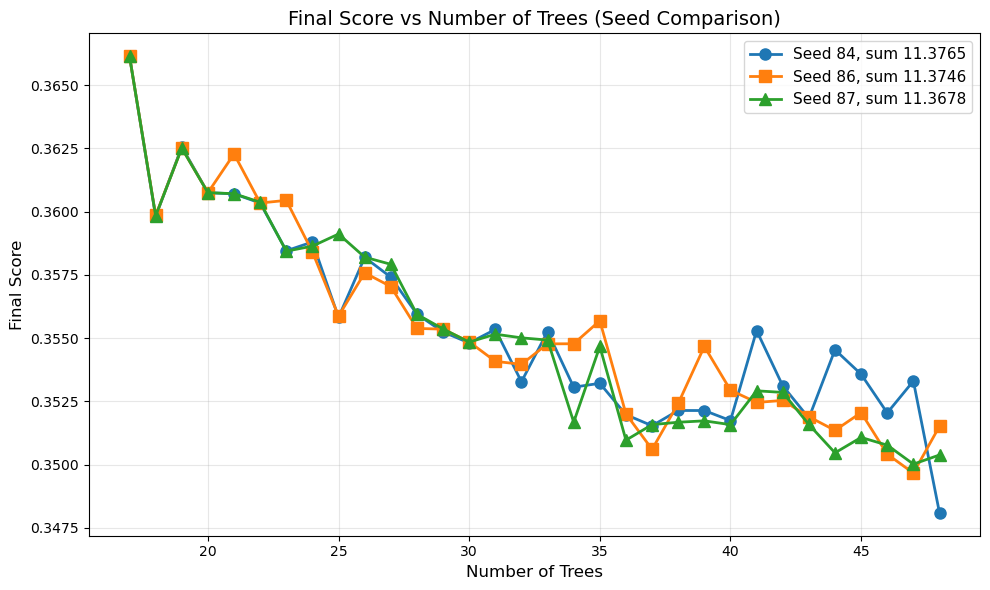

Plotted 32 common N_trees values: [np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48)]


[np.float64(0.3661426375893986),
 np.float64(0.3598315715789795),
 np.float64(0.36251000354164525),
 np.float64(0.3607466697692871),
 np.float64(0.3607090087164016),
 np.float64(0.3603707877072421),
 np.float64(0.35843534054963483),
 np.float64(0.3586358229319255),
 np.float64(0.3591135025024414),
 np.float64(0.3581996330848107),
 np.float64(0.35791711454038266),
 np.float64(0.35594085284641813),
 np.float64(0.35536226732977505),
 np.float64(0.35484158198038734),
 np.float64(0.355155760242093),
 np.float64(0.35501062870025635),
 np.float64(0.3549225547096946),
 np.float64(0.35167856777415557),
 np.float64(0.3546708788190569),
 np.float64(0.3509664270612929),
 np.float64(0.35158139306145747),
 np.float64(0.3516753347296464),
 np.float64(0.3517303222264999),
 np.float64(0.35158002376556396),
 np.float64(0.3529171827362805),
 np.float64(0.3528539339701335),
 np.float64(0.3515869850336119),
 np.float64(0.35046564448963513),
 np.float64(0.3510748545328776),
 np.float64(0.3507700381071671),


In [ ]:
# Compare final scores across multiple seeds
SEEDS_TO_DO = [84, 86, 87, 88]

import numpy as np
import glob
import matplotlib.pyplot as plt
import re

# Collect final scores for each seed
seed_scores = {seed: {} for seed in SEEDS_TO_DO}

for N_trees in np.arange(4,201,4):
    files = glob.glob(kgs.temp_dir + f'/*runs/done/ga_N{N_trees}_*.pickle')
    
    for f in files:
        # Extract seed from filename
        seed = None
        for s in SEEDS_TO_DO:
            if f'seed{s}' in f or f'_{s}' in f or f's{s}' in f:
                seed = s
                break
        
        if seed is None:
            # Try to parse seed from filename more generically
            seed_match = re.search(r'seed(\d+)|s(\d+)|_(\d+)(?!.*N\d)', f)
            if seed_match:
                parsed_seed = int(seed_match.group(1) or seed_match.group(2) or seed_match.group(3))
                if parsed_seed in SEEDS_TO_DO:
                    seed = parsed_seed
        
        if seed is not None:
            # Load data and get final score
            dat = kgs.dill_load(f)
            final_score = dat.ga.champions[0].phenotype.h[0,0].get()**2/N_trees  # Last generation's best cost
            seed_scores[seed][N_trees] = final_score

# Find N_trees values where all seeds have data
common_N_trees = set(seed_scores[SEEDS_TO_DO[0]].keys())
for seed in SEEDS_TO_DO[1:]:
    common_N_trees &= set(seed_scores[seed].keys())
common_N_trees = sorted(common_N_trees)

if common_N_trees:
    # Create plot
    plt.figure(figsize=(10, 6))
    markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*', 'h']
    
    for i, seed in enumerate(SEEDS_TO_DO):
        values = [seed_scores[seed][n] for n in common_N_trees]
        marker = markers[i % len(markers)]
        plt.plot(common_N_trees, values, marker=marker, linestyle='-', 
                label=f'Seed {seed}, sum {np.sum(values):.4f}', linewidth=2, markersize=8)
    
    plt.xlabel('Number of Trees', fontsize=12)
    plt.ylabel('Final Score', fontsize=12)
    plt.title('Final Score vs Number of Trees (Seed Comparison)', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Plotted {len(common_N_trees)} common N_trees values: {common_N_trees}")
else:
    print("No common N_trees values found for all seeds")

values

In [ ]:
seeds = [84,87]
N_trees = 48
res = []
for s in seeds:
    f = kgs.temp_dir + f'/controller_runs/done/ga_N{N_trees}_seed{s}_done.pickle'
    dat = kgs.dill_load(f)
    res.append(dat.ga.champions[0])
_,ax = plt.subplots(1,2, figsize=(12,6))
for i,r in enumerate(res):
    plt.sca(ax[i])
    pack_vis_sol.pack_vis_sol(r.phenotype, ax=ax[i])
    plt.title(f'Seed {seeds[i]}, score {r.phenotype.h[0,0].get()**2/N_trees:.8f}')

NameError: name 'kgs' is not defined

init LAP CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling LAP kernels ===
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -cubin /mnt/d//packing/temp/lap_batch_saved.cu -o /mnt/d//packing/temp/lap_batch.cubin
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function 'diversity_shortcut_kernel' for 'sm_89'
ptxas info    : Function properties for diversity_shortcut_kernel
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 1 barriers, 400 bytes cmem[0]
ptxas info    : Compile time = 10.231 ms
ptxas info    : Compiling entry function 'compute_costs' for 'sm_89'
ptxas info    : Function properties for compute_costs
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 0 barriers, 384 bytes cmem[0]
ptxas info    : Compile time = 3.065 ms
ptx

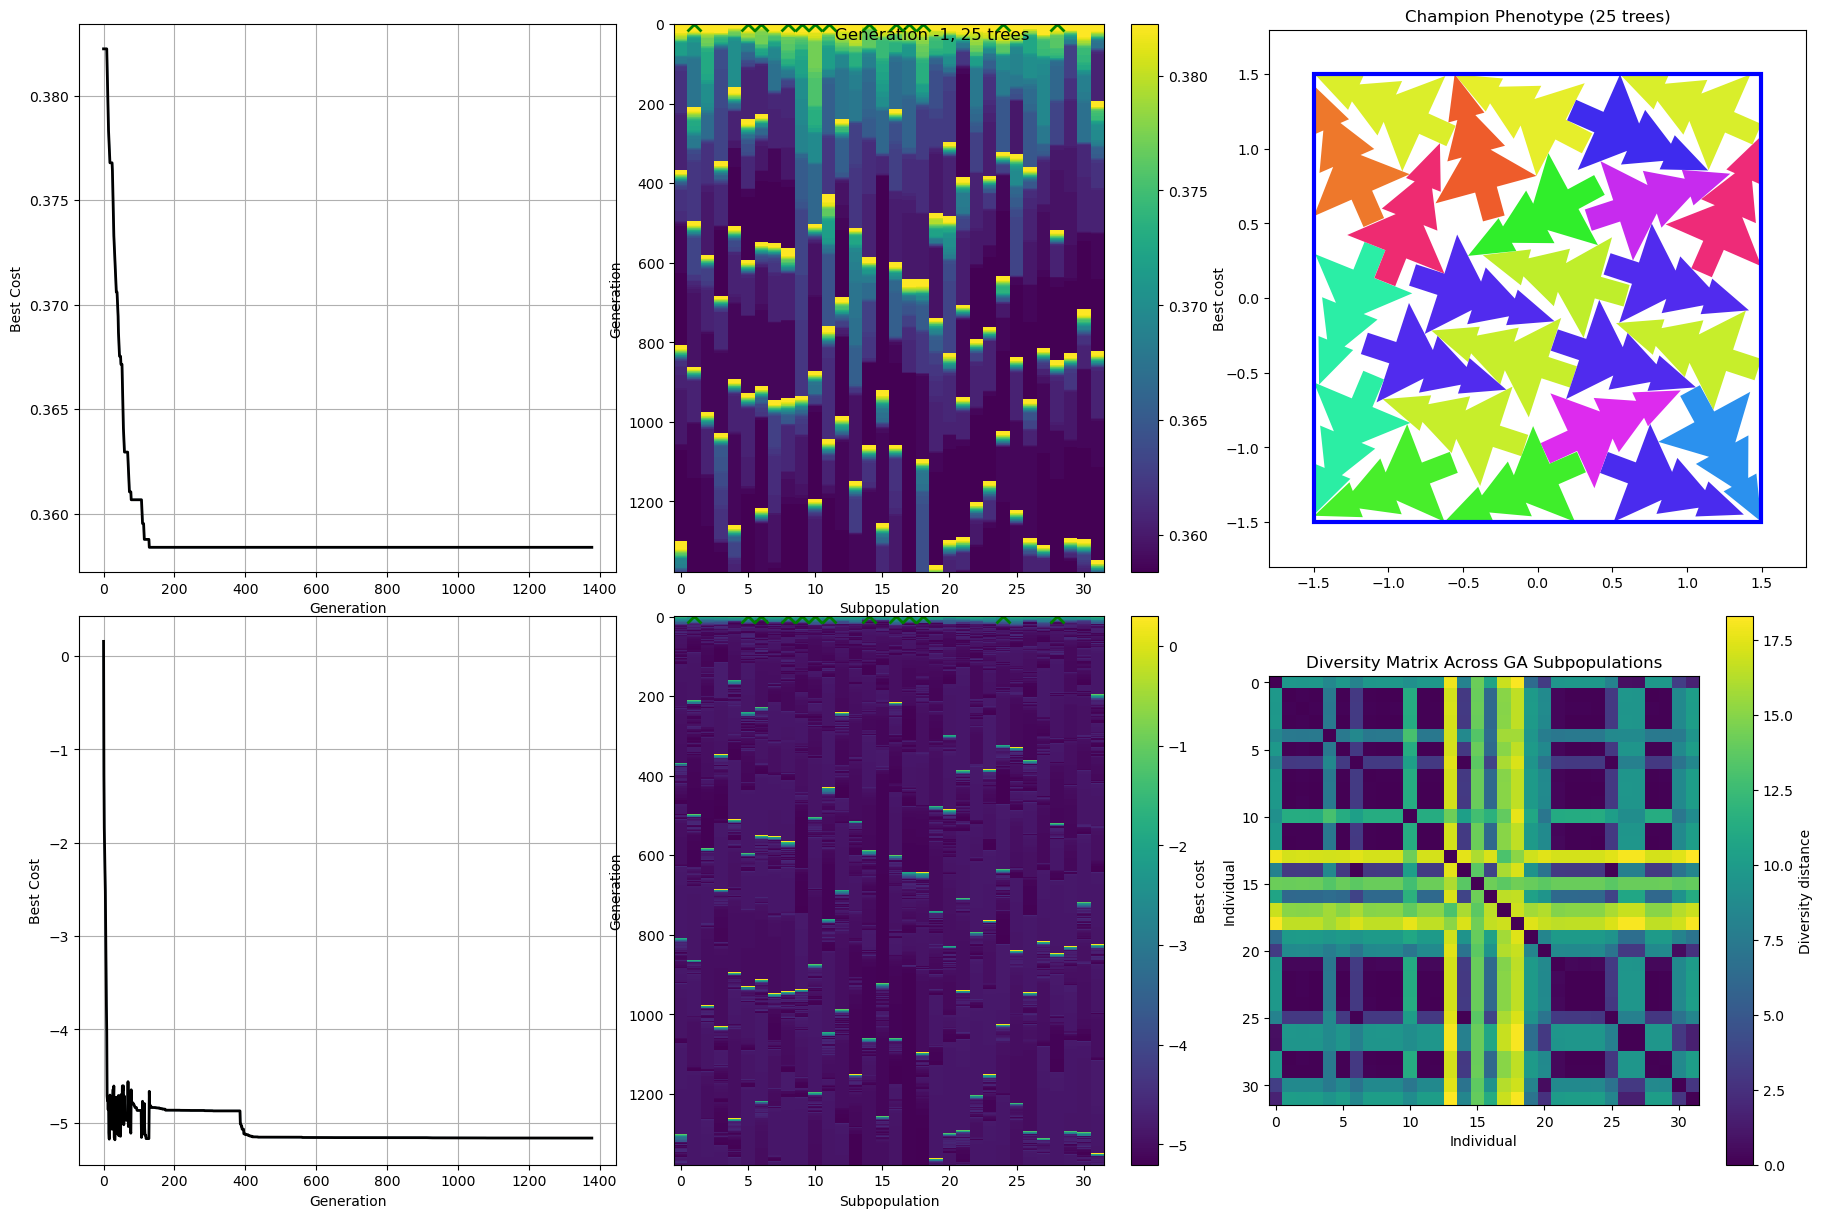

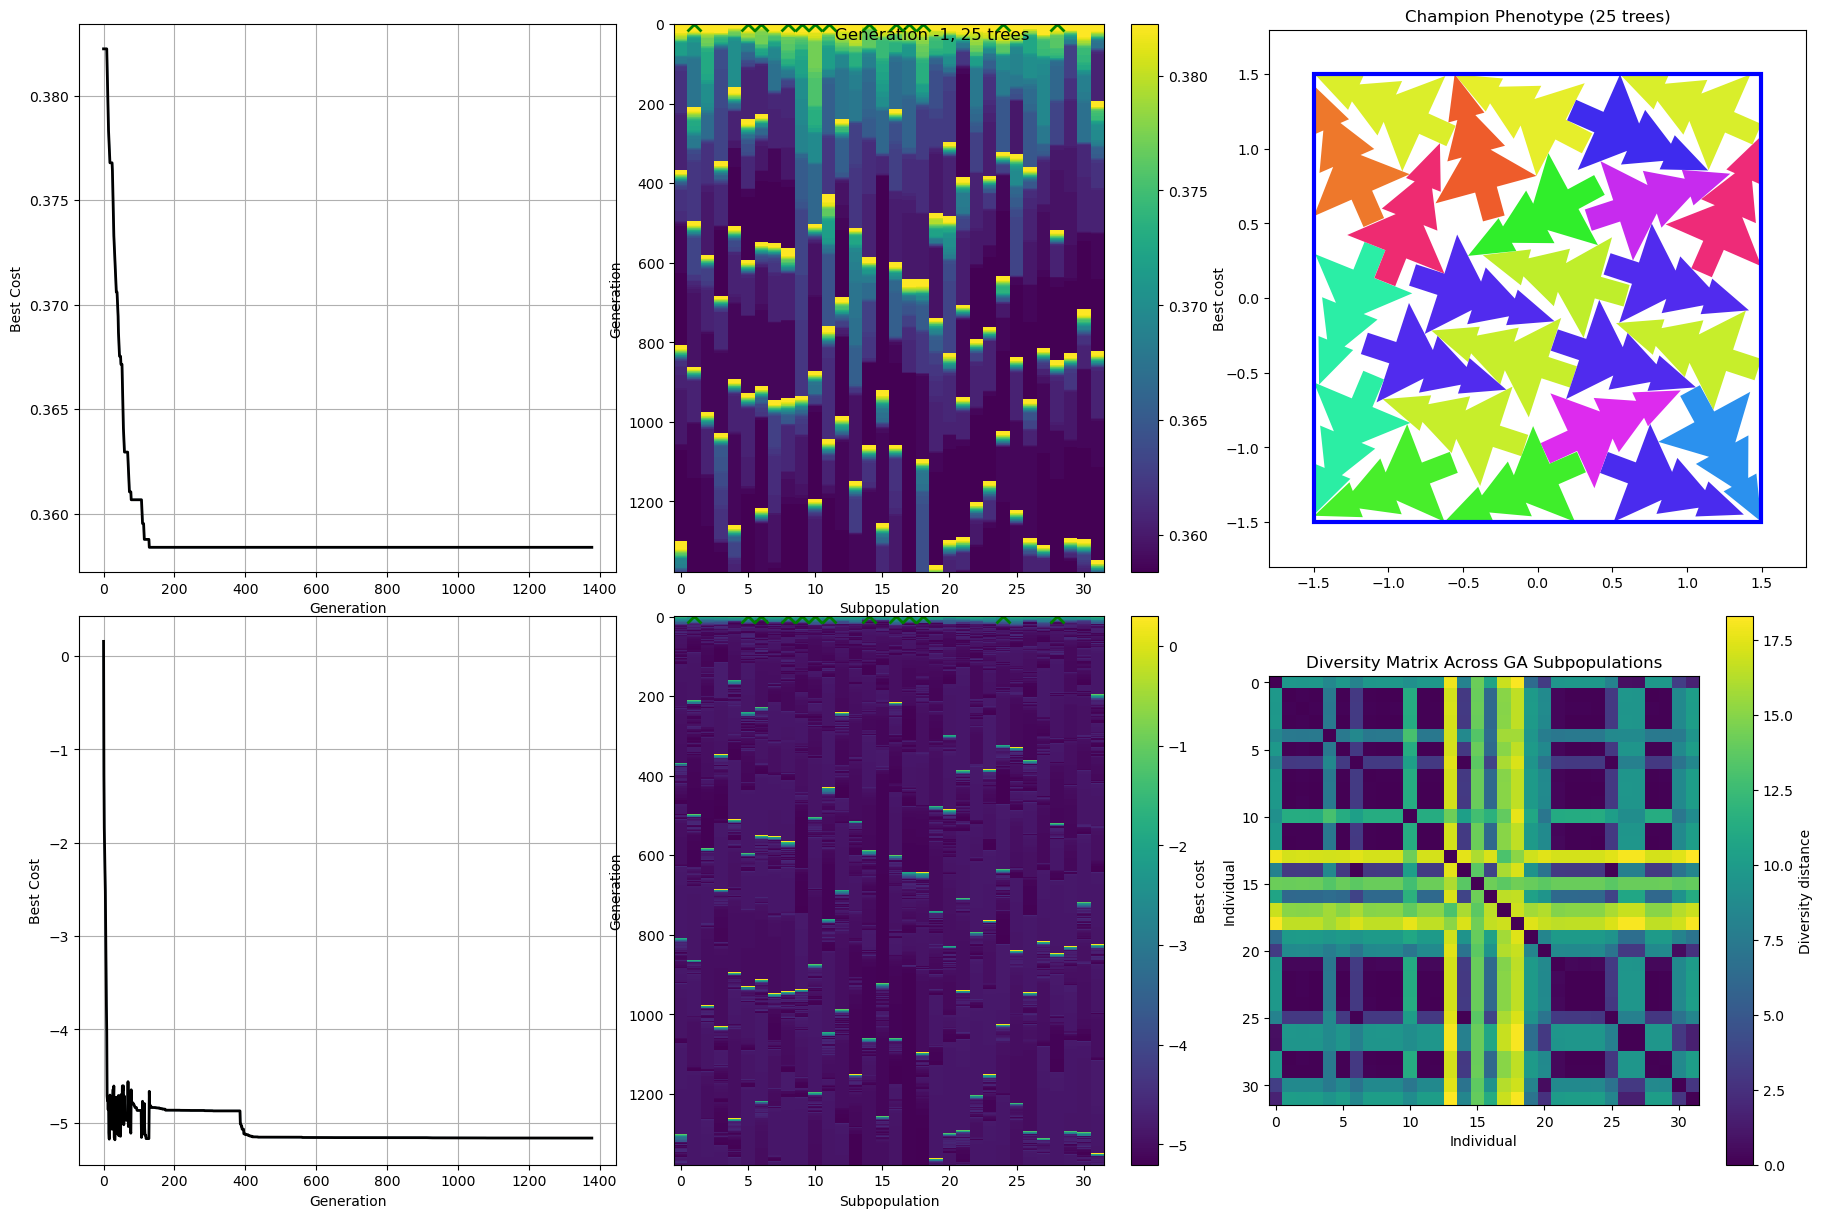

In [ ]:
dat = kgs.dill_load(kgs.temp_dir + f'/controller_runs/done/ga_N25_seed87_done.pickle')
dat.ga.diagnostic_plots(-1,None)

In [ ]:
2

2